In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and explore listings.csv

In [2]:
df_list = pd.read_csv('../../../Data/Airbnb/listings.csv', index_col=None, header=0)

df_list.info()
df_list.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6144 non-null   int64  
 1   listing_url                                   6144 non-null   object 
 2   scrape_id                                     6144 non-null   int64  
 3   last_scraped                                  6144 non-null   object 
 4   name                                          6144 non-null   object 
 5   description                                   6079 non-null   object 
 6   neighborhood_overview                         4599 non-null   object 
 7   picture_url                                   6144 non-null   object 
 8   host_id                                       6144 non-null   int64  
 9   host_url                                      6144 non-null   o

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69
1,25613,https://www.airbnb.com/rooms/25613,20210219004252,2021-02-20,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17826,-86.74162,Private room in house,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",$75.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,63,2021-02-20,510,4,0,2010-04-25,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,3.87
2,136015,https://www.airbnb.com/rooms/136015,20210219004252,2021-02-20,Apart. on the Ridge near Opryland,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,https://a0.muscache.com/pictures/2739438/005be...,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0%,0%,f,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Nashville, Tennessee, United States",District 15,NaN,36.19464,-86.67195,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",$103.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,0,0,0

## plot lat/long

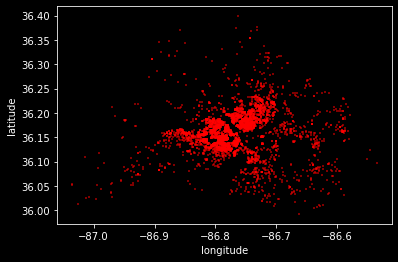

In [3]:
sns.scatterplot(
    data=df_list,
    x='longitude', y='latitude',
    marker='s', s=2, color='red', alpha=0.5, linewidth=0
);

In [4]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import get_provider, Vendors

# Define function to convert latitudes and longitudes to Mercator x and y coordinates
def merc_from_arrays(lats, lons):
    r_major = 6378137.000
    x = r_major * np.radians(lons)
    scale = x/lons
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + lats * (np.pi/180.0)/2.0)) * scale
    return x, y
# end

lat = df_list.latitude
lon = df_list.longitude

x, y = merc_from_arrays(lat, lon)

# HTML for plot
output_file("tile.html")

# Used to create map on plot
tile_provider = get_provider(Vendors.CARTODBPOSITRON) # Get tile provider for background map

# Create a Bokeh figure
p = figure(x_axis_type="mercator", y_axis_type="mercator")

# Add the map to the figure
p.add_tile(tile_provider)

# Plot the points on the figure
p.circle(x=x, y=y, size=5)

# Load the interactive HTML page with the plot
show(p)

### Calculate number of unique hosts

In [5]:
df_list.host_id.nunique()

2917

### Create a hosts dataframe from df_list (contains info on each unique host)

In [6]:
# get one row per unique host_id
df_hst = df_list.drop_duplicates(subset='host_id')

# only keep columns with the string "host"
df_hst = df_hst.iloc[:,df_hst.columns.str.contains('host')]

df_hst

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,1,0,1,0
1,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1,0,1,0
2,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0%,0%,f,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,2,2,0,0
3,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,"Nashville, Tennessee, United States",For 25 years I've been serving the world as a ...,within an hour,100%,56%,t,https://a0.muscache.com/im/pictures/user/272f5...,https://a0.muscache.com/im/pictures/user/272f5...,NaN,16.0,16.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,7,0,6,1
7,1547584,https://www.airbnb.com/users/show/1547584,Kurt,2011-12-29,"Nashville, Tennessee, United States",I've lived in Nashville since 1995 so know a l...,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/7272b...,https://a0.muscache.com/im/pictures/user/7272b...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,388403962,https://www.airbnb.com/users/show/388403962,Denise,2021-02-13,US,NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/09e89...,https://a0.muscache.com/im/pictures/user/09e89...,Oakhaven,0.0,0.0,['phone'],t,f,1,1,0,0
6127,388540769,https://www.airbnb.com/users/show/388540769,Robert,2021-02-14,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/822cb...,https://a0.muscache.com/im/pictures/user/822cb...,McKissack Park,0.0,0.0,"['email', 'phone']",t,f,1,1,0,0
6128,387822566,https://www.airbnb.com/users/show/387822566,Tim And Barb,2021-02-08,US,NaN,within an hour,100%,89%,f,https://a0.muscache.com/im/pictures/user/fb90b...,https://a0.muscache.com/im/pictures/user/fb90b...,NaN,0.0,0.0,"['email', 'phone', 'identity_manual']",t,t,1,1,0,0
6129,382275112,https://www.airbnb.com/users/show/382275112,Marilyn,2020-12-30,US,NaN,within an hour,100%,67%,f,https://a0.muscache.com/im/pictures/user/a377b...,https://a0.muscache.com/im/pictures/user/a377b...,11th Ward,6.0,6.0,['phone'],t,f,1,0,1,0


## convert and clean column types

### host_since

0      2009-04-03
1      2010-03-18
2      2011-06-05
3      2009-06-19
7      2011-12-29
          ...    
6124   2021-02-13
6127   2021-02-14
6128   2021-02-08
6129   2020-12-30
6141   2017-10-09
Name: host_since, Length: 2917, dtype: datetime64[ns]

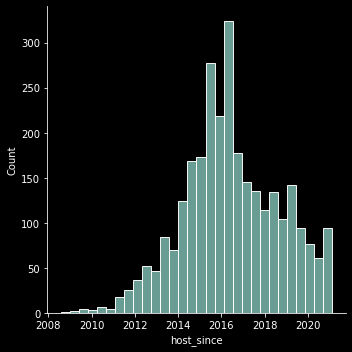

In [7]:
df_hst.host_since = pd.to_datetime(df_hst.host_since)

display(df_hst.host_since)

sns.displot(df_hst.host_since);

### host_is_superhost / host_has_profile_pic / host_identity_verified

In [8]:
df_hst.host_is_superhost.value_counts()

host_is_superhost
t    1713
f    1202
Name: count, dtype: int64

In [9]:
df_hst.host_is_superhost = df_hst.host_is_superhost.replace(
    {'t':1,
     'f':0}
)

df_hst.host_has_profile_pic = df_hst.host_has_profile_pic.replace(
    {'t':1,
     'f':0}
)

df_hst.host_identity_verified = df_hst.host_identity_verified.replace(
    {'t':1,
     'f':0}
)

In [10]:
df_hst.host_is_superhost.value_counts()

host_is_superhost
1.0    1713
0.0    1202
Name: count, dtype: int64

### response/acceptance rate

In [11]:
df_hst.host_response_rate.unique()

array([nan, '100%', '0%', '97%', '98%', '57%', '90%', '50%', '86%', '33%',
       '99%', '83%', '94%', '88%', '92%', '89%', '96%', '67%', '80%',
       '93%', '91%', '71%', '75%', '73%', '87%', '79%', '45%', '60%',
       '82%', '95%', '40%', '70%', '14%', '25%', '4%', '72%', '84%',
       '51%'], dtype=object)

In [12]:
# user-defined function
def fix_perc(x):
    if type(x) == str:
        return float(x[:-1])/100
    else:
        return np.nan
    # end
# end

df_hst.host_response_rate = df_hst.host_response_rate.apply(fix_perc)
df_hst.host_response_rate.head()

0    NaN
1    1.0
2    0.0
3    1.0
7    1.0
Name: host_response_rate, dtype: float64

In [13]:
df_hst.host_acceptance_rate = df_hst.host_acceptance_rate.apply(
    lambda x: float(x[:-1])/100 if type(x) == str else np.nan
)

df_hst.host_acceptance_rate.head()

0    0.19
1    1.00
2    0.00
3    0.56
7    0.95
Name: host_acceptance_rate, dtype: float64

### count number of listings for each host 

In [14]:
listings = df_list.host_id.value_counts().reset_index()

listings = listings.rename(
    columns={'count':'num_listings'}
)

listings.head()

,host_id,num_listings
0,368944610,181
1,101426897,150
2,106505883,121
3,6675690,85
4,85360355,75


In [15]:
df_hst = df_hst.merge( listings, on='host_id' )

df_hst.head()

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_listings
0,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,0.19,1.0,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1
1,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,1.0,1.00,1.0,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1
2,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0.0,0.00,0.0,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,2,2,0,0,2
3,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,"Nashville, Tennessee, United States",For 25 years I've been serving the world as a ...,within an hour,1.0,0.56,1.0,https://a0.muscache.com/im/pictures/user/272f5...,https://a0.muscache.com/im/pictures/user/272f5...,NaN,16.0,16.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,7,0,6,1,7
4,1547584,https://www.airbnb.com/users/show/1547584,Kurt,2011-12-29,"Nashville, Tennessee, United States",I've lived in Nashville since 1995 so know a l...,within an hour,1.0,0.95,1.0,https://a0.muscache.com/im/pictures/user/7272b...,https://a0.muscache.com/im/pictures/user/7272b...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,1,0,1,0,1


## count total reviews per month for each host

In [16]:
rev_per_month = df_list.groupby(["host_id"])['reviews_per_month'].sum().sort_values(ascending=False).reset_index()
rev_per_month.head()

,host_id,reviews_per_month
0,103365676,206.02
1,101426897,201.97
2,370932420,144.89
3,115505661,93.94
4,7894194,86.83


In [17]:
df_hst = df_hst.merge( rev_per_month, on='host_id' )
df_hst.head()

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_listings,reviews_per_month
0,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,0.19,1.0,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1,4.69
1,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,1.0,1.00,1.0,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1,3.87
2,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0.0,0.00,0.0,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,2,2,0,0,2,0.60
3,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,"Nashville, Tennessee, United States",For 25 years I've been serving the world as a ...,within an hour,1.0,0.56,1.0,https://a0.muscache.com/im/pictures/user/272f5...,https://a0.muscache.com/im/pictures/user/272f5...,NaN,16.0,16.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,7,0,6,1,7,2.82
4,1547584,https://www.airbnb.com/users/show/1547584,Kurt,2011-12-29,"Nashville, Tennessee, United States",I've lived in Nashville since 1995 so know a l...,within an hour,1.0,0.95,1.0,https://a0.muscache.com/im/pictures/user/7272b...,https://a0.muscache.com/im/pictures/user/7272b...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,1,0,1,0,1,2.20


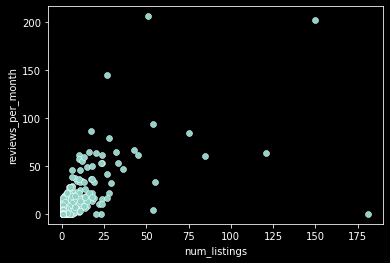

In [19]:
sns.scatterplot(
    data=df_hst,
    x='num_listings',
    y='reviews_per_month'
);

## Avg price for each host

In [20]:
df_list.price.sample(5)

2499     $90.00
1456    $128.00
4166    $186.00
1544     $70.00
1780    $638.00
Name: price, dtype: object

In [21]:
df_list.price = df_list.price.apply(
    lambda x: x[1:].replace(',','')
).astype(float)

df_list.price.sample(5)

1174     89.0
3861    504.0
5953    274.0
1124    300.0
1960    599.0
Name: price, dtype: float64

In [22]:
avg_price = round( df_list.groupby(["host_id"])['price'].mean().sort_values(ascending=False).reset_index(), 2 )

avg_price = avg_price.rename(
    columns={'price':'avg_price'}
)

avg_price.head()

,host_id,avg_price
0,267913366,25000.0
1,229458829,10000.0
2,232182126,3500.0
3,26248043,2750.0
4,50400360,2657.0


In [23]:
df_hst = df_hst.merge( avg_price, on='host_id' )

df_hst.head()

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_listings,reviews_per_month,avg_price
0,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,0.19,1.0,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1,4.69,40.00
1,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,1.0,1.00,1.0,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,1,0,1,0,1,3.87,75.00
2,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0.0,0.00,0.0,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,2,2,0,0,2,0.60,101.50
3,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,"Nashville, Tennessee, United States",For 25 years I've been serving the world as a ...,within an hour,1.0,0.56,1.0,https://a0.muscache.com/im/pictures/user/272f5...,https://a0.muscache.com/im/pictures/user/272f5...,NaN,16.0,16.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,7,0,6,1,7,2.82,27.43
4,1547584,https://www.airbnb.com/users/show/1547584,Kurt,2011-12-29,"Nashville, Tennessee, United States",I've lived in Nashville since 1995 so know a l...,within an hour,1.0,0.95,1.0,https://a0.muscache.com/im/pictures/user/7272b...,https://a0.muscache.com/im/pictures/user/7272b...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,1,0,1,0,1,2.20,69.00


## host_about length

how long is their about me section?

<AxesSubplot:>

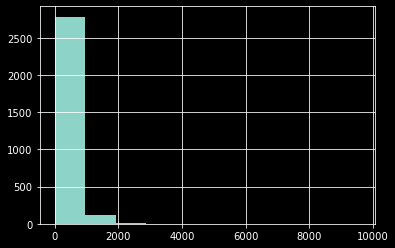

In [24]:
df_hst['about_len'] = df_hst['host_about'].apply(
    lambda x: len(x) if type(x) == str else 0
)

df_hst['about_len'].hist()

# Read and explore calendar.csv

In [25]:
df_cal = pd.read_csv('../../../Data/Airbnb/calendar.csv', index_col=None, header=0)

df_cal.info()
df_cal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242782 entries, 0 to 2242781
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 119.8+ MB


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


## fix types

In [26]:
df_cal.date = pd.to_datetime(df_cal.date)

df_cal.available = df_cal.available.replace({'f':0, 't':1})

df_cal.price = df_cal.price.apply(
    lambda x: x[1:].replace(',','')
).astype(float)

df_cal.adjusted_price = df_cal.adjusted_price.apply(
    lambda x: x[1:].replace(',','')
).astype(float)

df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,0,40.0,40.0,30.0,365.0
1,6422,2021-02-21,0,40.0,40.0,30.0,365.0
2,6422,2021-02-22,0,40.0,40.0,30.0,365.0
3,6422,2021-02-23,0,40.0,40.0,30.0,365.0
4,6422,2021-02-24,0,40.0,40.0,30.0,365.0


### plot price vs adjusted_price

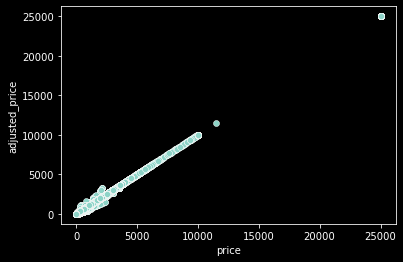

In [27]:
sns.scatterplot(
    data=df_cal,
    x='price',
    y='adjusted_price'
);

## plot availablity of a random listing

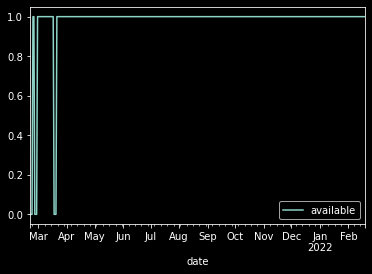

In [28]:
idxs = df_cal.listing_id.unique()

idx = np.random.choice( idxs, 1 )[0]

df_idx = df_cal[ df_cal.listing_id == idx ]

df_idx.plot(
    x='date',
    y='available'
);

### Calculate and visualize availability rates for all listings

In [29]:
df_cal.listing_id.unique().shape

(6144,)

In [30]:
df_list.id.unique().shape

(6144,)

In [31]:
pt = df_cal.pivot_table(
    index='listing_id',
    columns='date',
    values='available',
    fill_value=0
)

pt

date,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,...,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6422,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
25613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
136015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
258817,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
289242,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48207668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
48208643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
48211893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


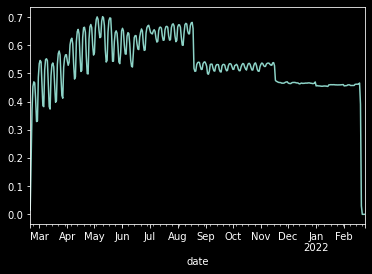

In [32]:
pt.mean(axis=0).plot();

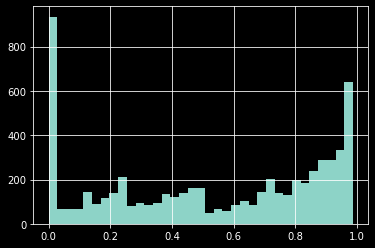

In [33]:
pt.mean(axis=1).hist(bins=35);

# Read and explore reviews.csv

In [34]:
df_rev = pd.read_csv('../../../Data/Airbnb/reviews.csv', index_col=None, header=0)

df_rev.info()
df_rev.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262469 entries, 0 to 262468
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     262469 non-null  int64 
 1   id             262469 non-null  int64 
 2   date           262469 non-null  object
 3   reviewer_id    262469 non-null  int64 
 4   reviewer_name  262469 non-null  object
 5   comments       262339 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.0+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


## Count reviews per listing

<AxesSubplot:>

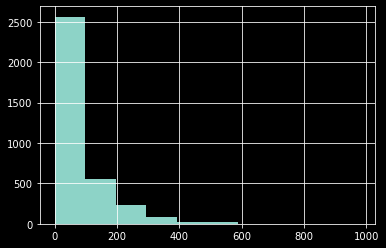

In [35]:
df_rev.listing_id.value_counts().hist()